In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression


In [5]:
data=pd.read_excel("/content/employee_burnout_analysis-AI 2.xlsx")

In [6]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [7]:
data.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [8]:
data["Company Type"].unique()

array(['Service', 'Product'], dtype=object)

In [9]:
data.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [10]:
data.shape

(22750, 9)

In [11]:
data.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [12]:
data.columns.tolist()

['Employee ID',
 'Date of Joining',
 'Gender',
 'Company Type',
 'WFH Setup Available',
 'Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Burn Rate']

In [13]:
data.nunique()

,0
Employee ID,22750
Date of Joining,366
Gender,2
Company Type,2
WFH Setup Available,2
Designation,6
Resource Allocation,10
Mental Fatigue Score,101
Burn Rate,101


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [15]:
data.isnull().sum().values.sum()

4622

In [16]:
data.corr(numeric_only=True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.737556
Resource Allocation,0.856278
Mental Fatigue Score,0.944546


In [17]:
data = data.dropna()

In [18]:
data.shape

(18590, 9)

In [19]:
data.dtypes

,0
Employee ID,object
Date of Joining,datetime64[ns]
Gender,object
Company Type,object
WFH Setup Available,object
Designation,int64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [20]:
data = data.drop('Employee ID', axis = 1)

Min date 2008-01-01 00:00:00
Max date 2008-12-31 00:00:00


<Axes: xlabel='Month', ylabel='Count'>

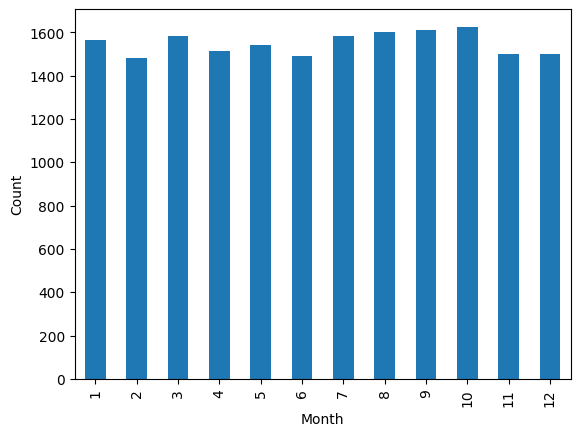

In [21]:
print(f"Min date {data['Date of Joining'].min()}")
print(f"Max date {data['Date of Joining'].max()}")
data_month = data.copy()

data_month["Date of Joining"] = data_month['Date of Joining'].astype("datetime64[ns]")
data_month["Date of Joining"].groupby(data_month["Date of Joining"].dt.month).count().plot(kind="bar", xlabel="Month", ylabel="Count")



In [22]:
data_2008 = pd.to_datetime(["2008-01-01"]*len(data))
data["Days"] = data['Date of Joining'].astype("datetime64[ns]").sub(data_2008).dt.days
data.Days

,Days
0,273
1,334
3,307
4,205
5,330
...,...
22743,349
22744,147
22746,18
22748,9


In [23]:
numeric_data = data.select_dtypes(include=['number'])
correlation = numeric_data.corr()['Burn Rate']
print(correlation)

Designation             0.736412
Resource Allocation     0.855005
Mental Fatigue Score    0.944389
Burn Rate               1.000000
Days                    0.000309
Name: Burn Rate, dtype: float64


In [24]:
data.corr(numeric_only=True)['Burn Rate'][:]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389
Burn Rate,1.000000
Days,0.000309


In [25]:
data = data.drop(['Date of Joining','Days'],axis = 1)

In [26]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


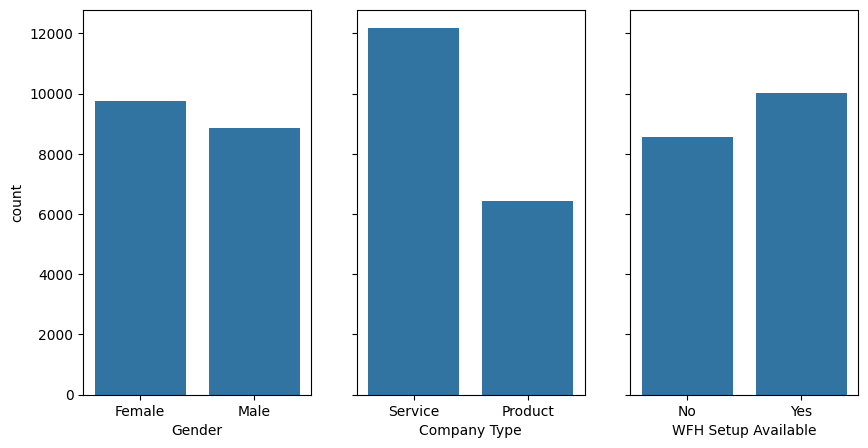

In [27]:
cat_columns = data.select_dtypes(object).columns
fig, ax = plt.subplots(nrows=1, ncols=len(cat_columns), sharey=True, figsize=(10,5))
for i, c in enumerate(cat_columns):
  sns.countplot(x=c, data=data, ax=ax[i])
plt.show()


In [28]:
if all(col in data.columns for col in['Company Type', 'WFH Setup Available','Gender']):
  data = pd.get_dummies(data, columns=['Company Type', 'WFH Setup Available','Gender'], drop_first=True)
  data.head()
  encoded_columns = data.columns
else:
  print("Error: One or more of the specified columns are not present in the DataFrame.")
  print(data.columns)

In [29]:
data

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Company Type_Service,WFH Setup Available_Yes,Gender_Male
0,2,3.0,3.8,0.16,True,False,False
1,1,2.0,5.0,0.36,True,True,True
3,1,1.0,2.6,0.20,True,True,True
4,3,7.0,6.9,0.52,True,False,False
5,2,4.0,3.6,0.29,False,True,True
...,...,...,...,...,...,...,...
22743,1,3.0,6.0,0.48,False,True,False
22744,3,7.0,6.2,0.54,False,False,True
22746,3,6.0,6.7,0.59,False,True,False
22748,2,5.0,5.9,0.52,True,False,False


In [30]:
y = data['Burn Rate']
x = data.drop('Burn Rate', axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=True, random_state=1)
#                                                   ^ Changed 'X' to 'x'

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [32]:
X_train

,Designation,Resource Allocation,Mental Fatigue Score,Company Type_Service,WFH Setup Available_Yes,Gender_Male
3249,0.729794,0.733212,0.501849,0.714251,-1.104601,1.049455
7925,0.729794,0.733212,0.398570,-1.400068,0.905304,1.049455
16635,-0.155002,-0.730675,-1.925209,0.714251,-1.104601,1.049455
3456,1.614590,0.733212,1.224802,-1.400068,-1.104601,-0.952875
17562,0.729794,0.245250,-0.169465,0.714251,-1.104601,1.049455
...,...,...,...,...,...,...
13453,0.729794,1.221175,1.637919,-1.400068,0.905304,-0.952875
21179,0.729794,0.245250,-1.047337,0.714251,0.905304,1.049455
6327,0.729794,0.245250,0.088733,0.714251,-1.104601,1.049455
14933,-0.155002,0.245250,0.708407,0.714251,-1.104601,1.049455


In [33]:
y_train

,Burn Rate
3249,0.62
7925,0.50
16635,0.13
3456,0.66
17562,0.42
...,...
13453,0.78
21179,0.30
6327,0.42
14933,0.54


In [34]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [35]:
print("Linear Regression Model Performance Metrics:\n")

y_pred = linear_regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)



Linear Regression Model Performance Metrics:

Mean Squared Error: 0.0031265186703183815
Root Mean Squared Error: 0.05591528118786833
Mean Absolute Error: 0.045748186923994995
R-squared Score: 0.9199255887706531


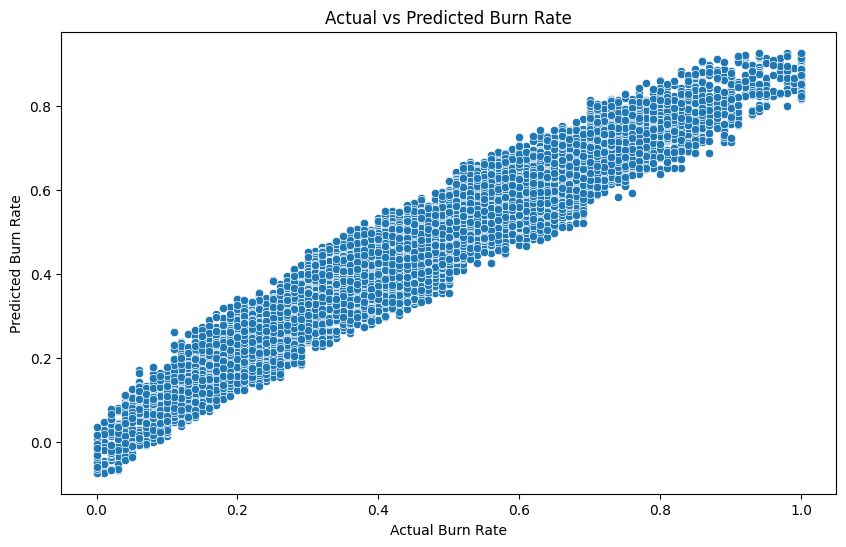

In [36]:
# Visualize Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Burn Rate")
plt.ylabel("Predicted Burn Rate")
plt.title("Actual vs Predicted Burn Rate")
plt.show()